In [1]:

import kagglehub
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import tree
import matplotlib.pyplot as plt

C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
#Reading and Cleaning CSV

# Download latest version
path = kagglehub.dataset_download("gregorut/videogamesales")

#Read the CSV file into a DataFrame
df = pd.read_csv(path + "/music.csv")

print(df.head())

   age  gender   genre
0   20       1  HipHop
1   23       1  HipHop
2   25       1  HipHop
3   26       1    Jazz
4   29       1    Jazz


In [3]:
#Splittin the DataFrame into test/train sets

#Input DataFrame
X = df.drop(columns=['genre'])

#Output DataFrame
y = df['genre']

#Splits the data into training and testing sets, allocated 20% of the data for testing and 80% for training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [4]:
#Create a model
#Creating a decision tree classifier
model = DecisionTreeClassifier()

#Fitting the model to the data
model.fit(X_train, y_train)

#Make prediction
#Using the trained model to make predictions on the test set
#The predict method is called on the model, passing in the test set features (X_test) to get predictions for the corresponding labels (y_test)
predictions = model.predict(X_test)

# Print predictions
print(predictions)

['Classical' 'HipHop' 'Classical' 'HipHop']


In [5]:
#Calculating accuracy
#Calculating the accuracy of the model by comparing the predicted labels with the true labels of the test set
#The accuracy_score function from sklearn.metrics is used to compute the accuracy, which is the ratio of correctly predicted instances to the total instances in the test set
#The accuracy is then multiplied by 100 to convert it to a percentage
accuracy = accuracy_score(y_test, predictions)
accuracy_percentage = accuracy * 100
print(f"Accuracy: {accuracy_percentage:.2f}%")

Accuracy: 100.00%


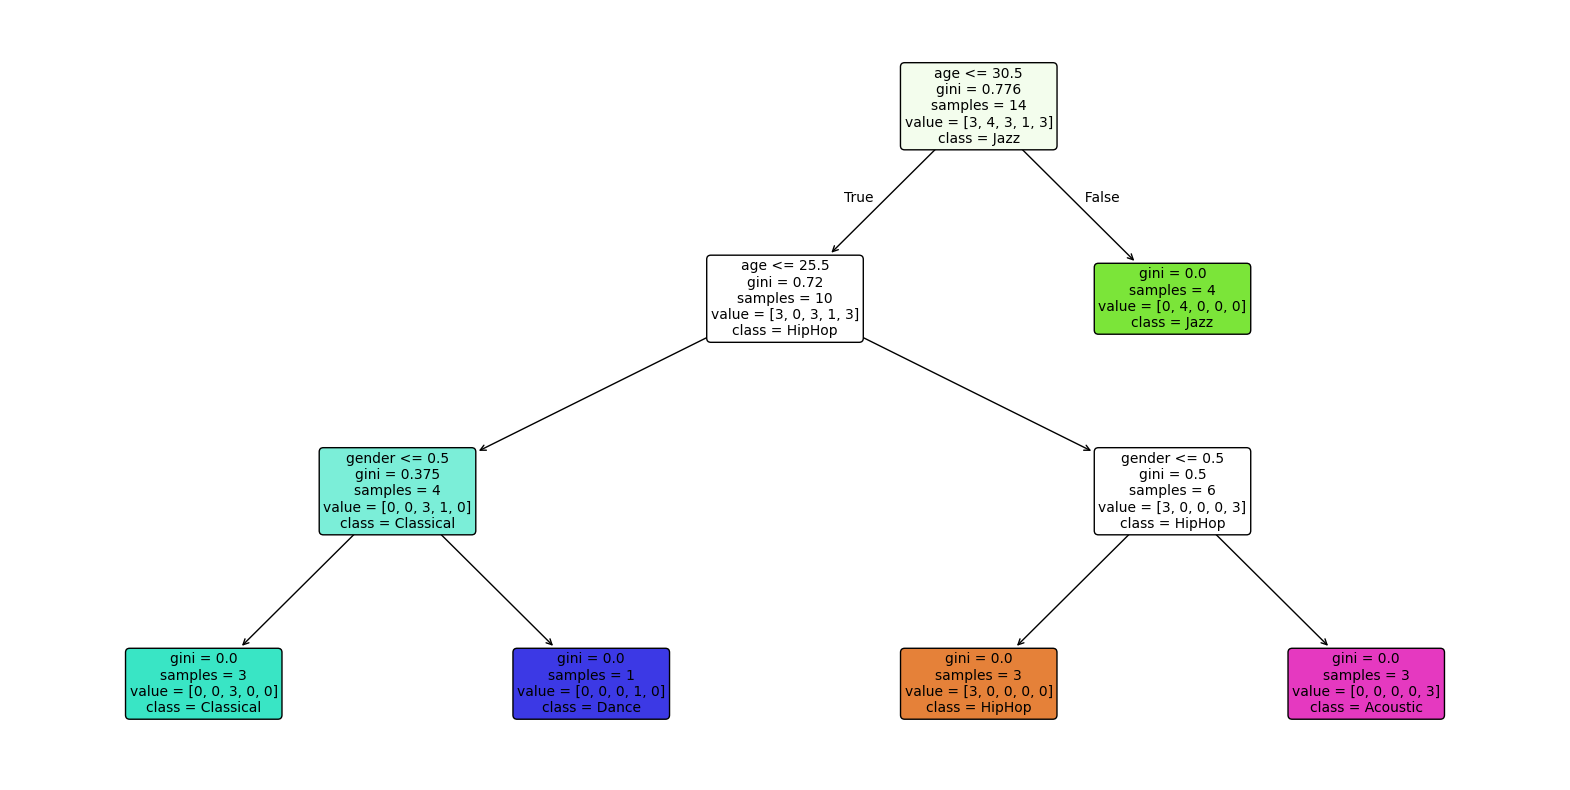

In [6]:
#Visualizing the Decision Tree
#Visualizing the decision tree using matplotlib
#The plot_tree function from sklearn.tree is used to create a visual representation of the decision tree
#The figure size is set to 20x10 inches, and the tree is plotted with a specific font size of 10
#Class names and age labels are also included in the plot to indicate the predicted classes at each leaf node of the tree
#Colors are used to differentiate between the classes, and the feature names are displayed at each node of the tree
plt.figure(figsize=(20, 10))
tree.plot_tree(model, feature_names=X.columns, class_names=y.unique(), filled=True, rounded=True, fontsize=10)
plt.show()